In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
path = r'D:\RNW\Project\Simple Linear Regression\Green-Texti\Exam-25\Green_Dataset.csv'
#reading the dataset
df = pd.read_csv(path)

## Preview the Dataset
Let's look at the first 5 rows to understand the structure and content.

In [3]:
# Display the first 5 rows of the dataset 
display(df.head())

,Index,vendor_id,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Total_amount,Payment_type
0,1,1,18-12-2013 22.26,18-12-2013 22.44,N,1,1,10.20,29.5,0.5,0.5,9.15,0.0,39.65,1
1,2,2,30-12-2013 19.59,30-12-2013 20.05,N,1,5,1.05,6.0,1.0,0.5,0.00,0.0,7.50,2
2,3,2,15-12-2013 10.57,15-12-2013 11.03,N,1,1,1.38,6.5,0.0,0.5,0.00,0.0,7.00,2
3,4,2,24-12-2013 23.06,24-12-2013 23.18,N,1,1,1.44,9.5,0.5,0.5,0.00,0.0,10.50,2
4,5,2,31-10-2013 20.07,31-10-2013 20.21,N,1,1,2.89,13.0,0.5,0.5,0.00,0.0,14.00,2


# 1. Data Exploration & Cleaning
Let's explore the dataset, check for missing values, and visualize feature distributions.

In [4]:
# Show dataset info
print('Dataset shape:', df.shape)
df.info()
# Show basic statistics
display(df.describe())

Dataset shape: (196660, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196660 entries, 0 to 196659
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Index               196660 non-null  int64  
 1   vendor_id           196660 non-null  int64  
 2   pickup_datetime     196660 non-null  object 
 3   dropoff_datetime    196660 non-null  object 
 4   Store_and_fwd_flag  196660 non-null  object 
 5   rate_code           196660 non-null  int64  
 6   Passenger_count     196660 non-null  int64  
 7   Trip_distance       196660 non-null  float64
 8   Fare_amount         196660 non-null  float64
 9   Extra               196660 non-null  float64
 10  MTA_tax             196660 non-null  float64
 11  Tip_amount          196660 non-null  float64
 12  Tolls_amount        196660 non-null  float64
 13  Total_amount        196660 non-null  float64
 14  Payment_type        196660 non-null  int64  
dtypes: flo

,Index,vendor_id,rate_code,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Total_amount,Payment_type
count,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000,196660.000000
mean,98330.500000,1.794239,1.077235,1.562738,3.094394,12.545686,0.365370,0.492435,0.893668,0.142823,14.440386,1.680906
std,56770.996307,0.404258,0.535632,1.284016,3.034825,9.015560,1.590742,0.061032,1.999721,1.919836,10.675468,0.488217
min,1.000000,1.000000,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000
25%,49165.750000,2.000000,1.000000,1.000000,1.160000,6.500000,0.000000,0.500000,0.000000,0.000000,7.700000,1.000000
50%,98330.500000,2.000000,1.000000,1.000000,2.080000,9.500000,0.500000,0.500000,0.000000,0.000000,11.000000,2.000000
75%,147495.250000,2.000000,1.000000,1.000000,3.970000,15.500000,0.500000,0.500000,1.000000,0.000000,17.500000,2.000000
max,196660.000000,2.000000,6.000000,8.000000,118.450000,299.000000,679.530000,0.500000,160.000000,750.000000,771.000000,4.000000


In [5]:
# Check for missing values
missing = df.isnull().sum()
print('Missing values per column:')
display(missing[missing > 0] if missing.sum() > 0 else 'No missing values found.')

Missing values per column:


'No missing values found.'

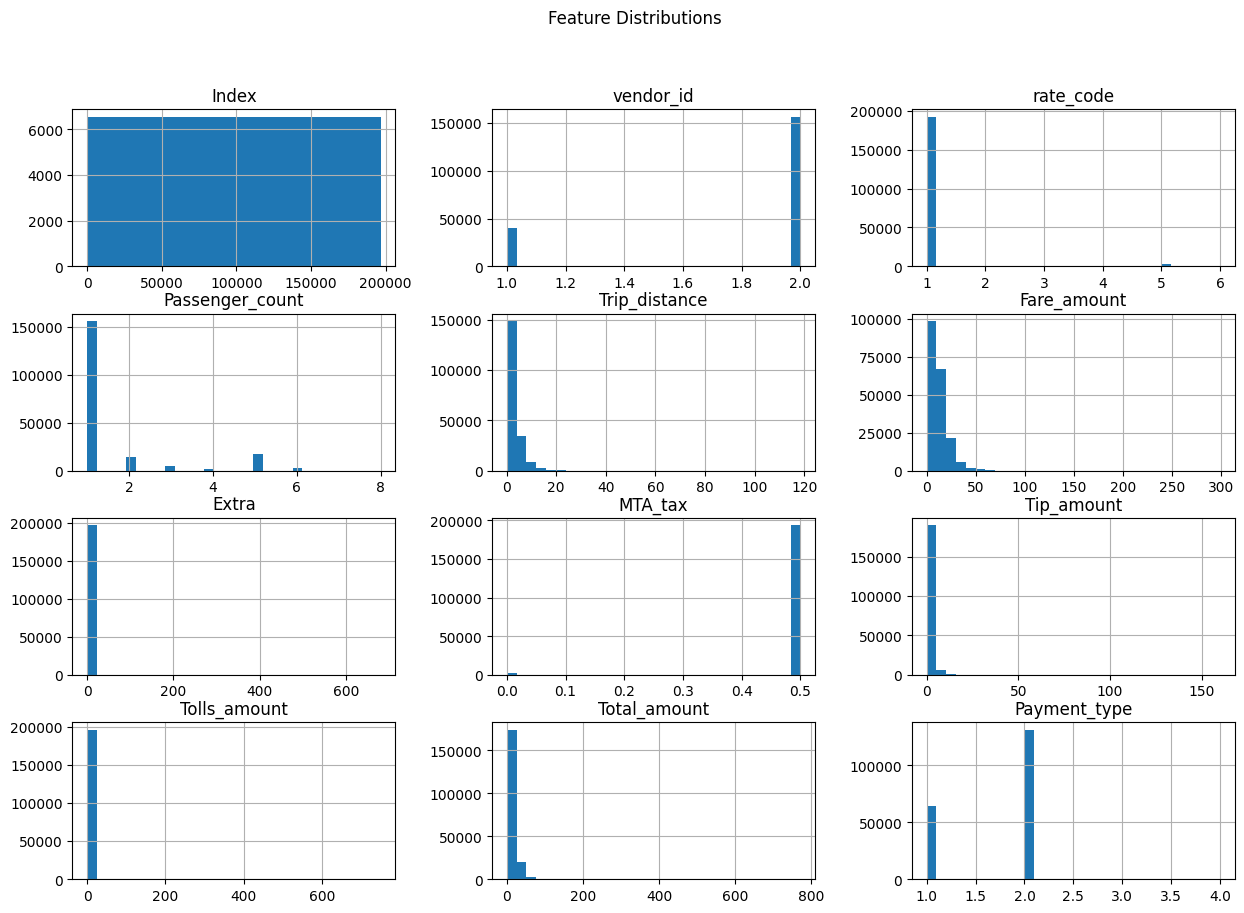

In [6]:
# Plot distributions for numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

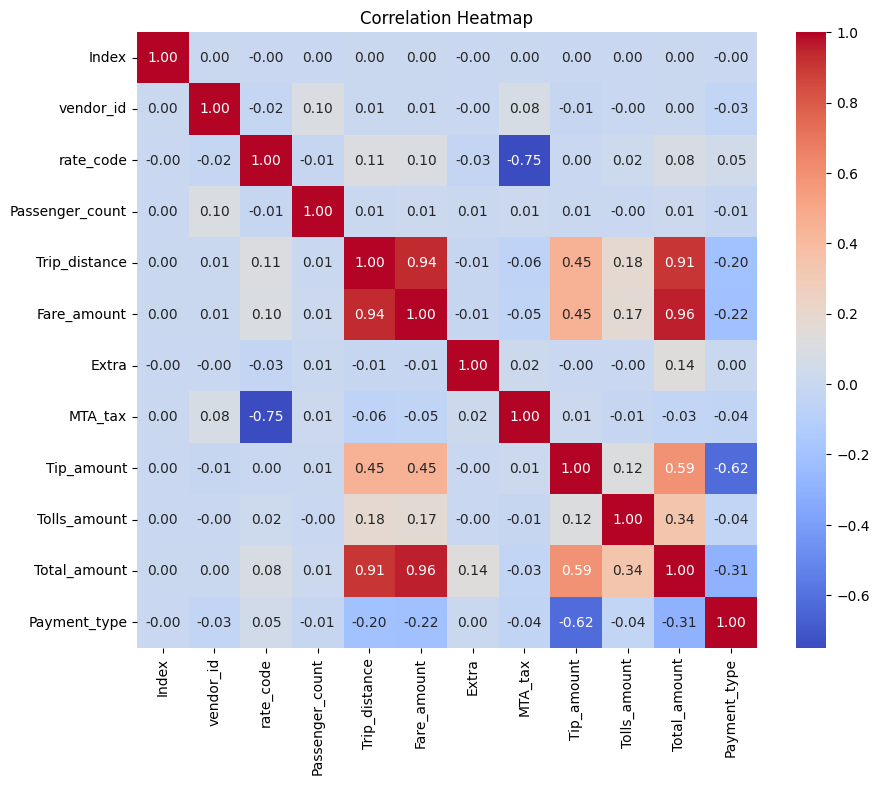

In [7]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 2. Feature Engineering
In this section, we will:
- Encode categorical features (`Payment_type`, `vendor_id`, `rate_code`)
- Remove outliers from `Fare_amount` and `Trip_distance`
- Drop the `Index` column
- Scale numeric features for ML algorithms

In [8]:
# Encode categorical features using one-hot encoding
categorical_cols = ['Payment_type', 'vendor_id', 'rate_code']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,Index,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,...,Total_amount,Payment_type_2,Payment_type_3,Payment_type_4,vendor_id_2,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6
0,1,18-12-2013 22.26,18-12-2013 22.44,N,1,10.20,29.5,0.5,0.5,9.15,...,39.65,False,False,False,False,False,False,False,False,False
1,2,30-12-2013 19.59,30-12-2013 20.05,N,5,1.05,6.0,1.0,0.5,0.00,...,7.50,True,False,False,True,False,False,False,False,False
2,3,15-12-2013 10.57,15-12-2013 11.03,N,1,1.38,6.5,0.0,0.5,0.00,...,7.00,True,False,False,True,False,False,False,False,False
3,4,24-12-2013 23.06,24-12-2013 23.18,N,1,1.44,9.5,0.5,0.5,0.00,...,10.50,True,False,False,True,False,False,False,False,False
4,5,31-10-2013 20.07,31-10-2013 20.21,N,1,2.89,13.0,0.5,0.5,0.00,...,14.00,True,False,False,True,False,False,False,False,False


In [9]:
# Remove outliers from Fare_amount and Trip_distance using IQR
for col in ['Fare_amount', 'Trip_distance']:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_encoded = df_encoded[(df_encoded[col] >= lower) & (df_encoded[col] <= upper)]
print('Shape after outlier removal:', df_encoded.shape)

Shape after outlier removal: (178882, 21)


In [10]:
# Drop the Index column if present
if 'Index' in df_encoded.columns:
    df_encoded = df_encoded.drop('Index', axis=1)
print('Columns after dropping Index:', df_encoded.columns.tolist())

Columns after dropping Index: ['pickup_datetime', 'dropoff_datetime', 'Store_and_fwd_flag', 'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'Total_amount', 'Payment_type_2', 'Payment_type_3', 'Payment_type_4', 'vendor_id_2', 'rate_code_2', 'rate_code_3', 'rate_code_4', 'rate_code_5', 'rate_code_6']


In [11]:
# Scale numeric features using StandardScaler


numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
display(df_encoded.head())

,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Total_amount,Payment_type_2,Payment_type_3,Payment_type_4,vendor_id_2,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6
1,30-12-2013 19.59,30-12-2013 20.05,N,2.684069,-0.803868,-0.843040,0.380428,0.116568,-0.485245,-0.027838,-0.699019,True,False,False,True,False,False,False,False,False
2,15-12-2013 10.57,15-12-2013 11.03,N,-0.437048,-0.603947,-0.748717,-0.223996,0.116568,-0.485245,-0.027838,-0.775800,True,False,False,True,False,False,False,False,False
3,24-12-2013 23.06,24-12-2013 23.18,N,-0.437048,-0.567598,-0.182780,0.078216,0.116568,-0.485245,-0.027838,-0.238336,True,False,False,True,False,False,False,False,False
4,31-10-2013 20.07,31-10-2013 20.21,N,-0.437048,0.310839,0.477479,0.078216,0.116568,-0.485245,-0.027838,0.299128,True,False,False,True,False,False,False,False,False
5,28-12-2013 8.45,28-12-2013 8.56,N,-0.437048,0.492585,0.194510,-0.223996,0.116568,-0.485245,-0.027838,-0.007995,True,False,False,True,False,False,False,False,False


In [12]:
# Export the processed DataFrame to CSV
output_path = r'D:\RNW\Project\Simple Linear Regression\Green-Texti\Green_EDA_Done.csv'
# If you get PermissionError, make sure the file is not open in another program (like
try:
	df_encoded.to_csv(output_path, index=False)
	print(f'Processed data exported to {output_path}')
except PermissionError:
	alt_path = r'D:\RNW\Project\Simple Linear Regression\Green-Texti\Green_EDA_Done_new.csv'
	df_encoded.to_csv(alt_path, index=False)
	print(f'PermissionError: File was open or locked. Exported to {alt_path} instead.')

Processed data exported to D:\RNW\Project\Simple Linear Regression\Green-Texti\Green_EDA_Done.csv


## Post-Engineering Data Checks
Let's visualize the processed data to confirm feature engineering and cleaning steps.

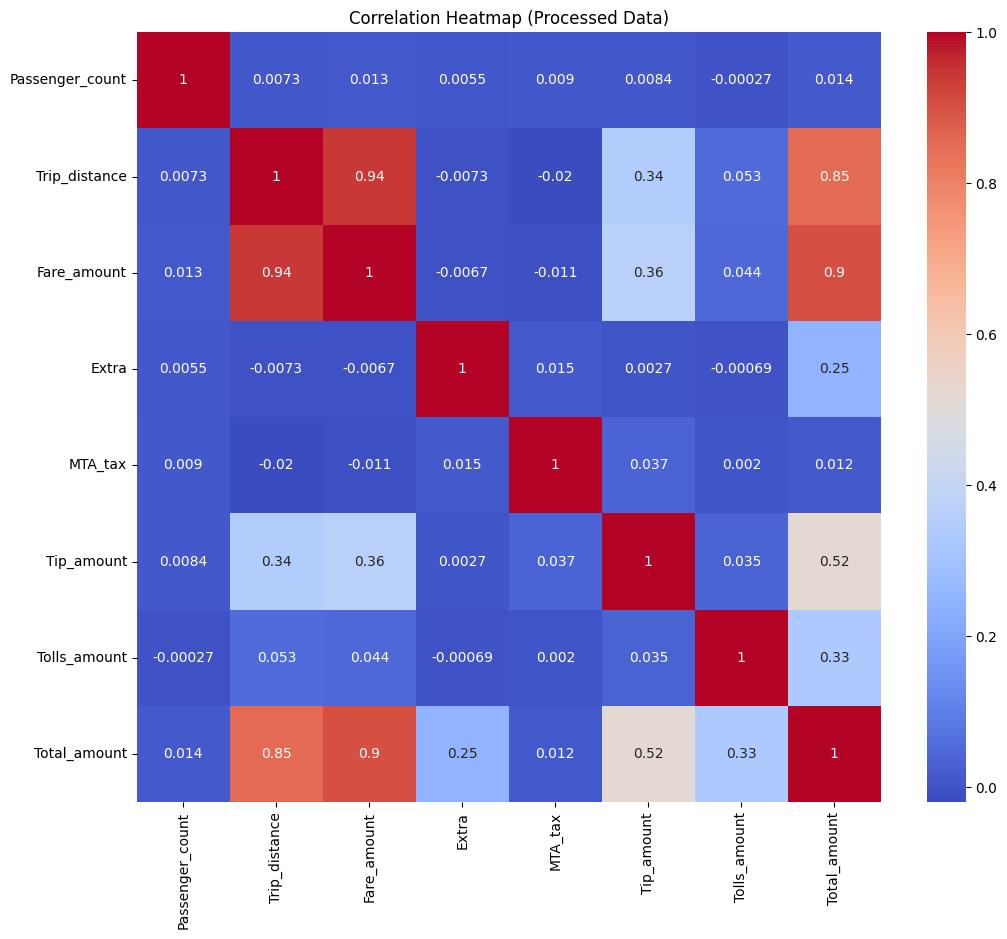

In [13]:
# Correlation heatmap for processed data (numeric columns only)
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded[numeric_cols].corr(), annot= True, cmap='coolwarm')
plt.title('Correlation Heatmap (Processed Data)')
plt.show()

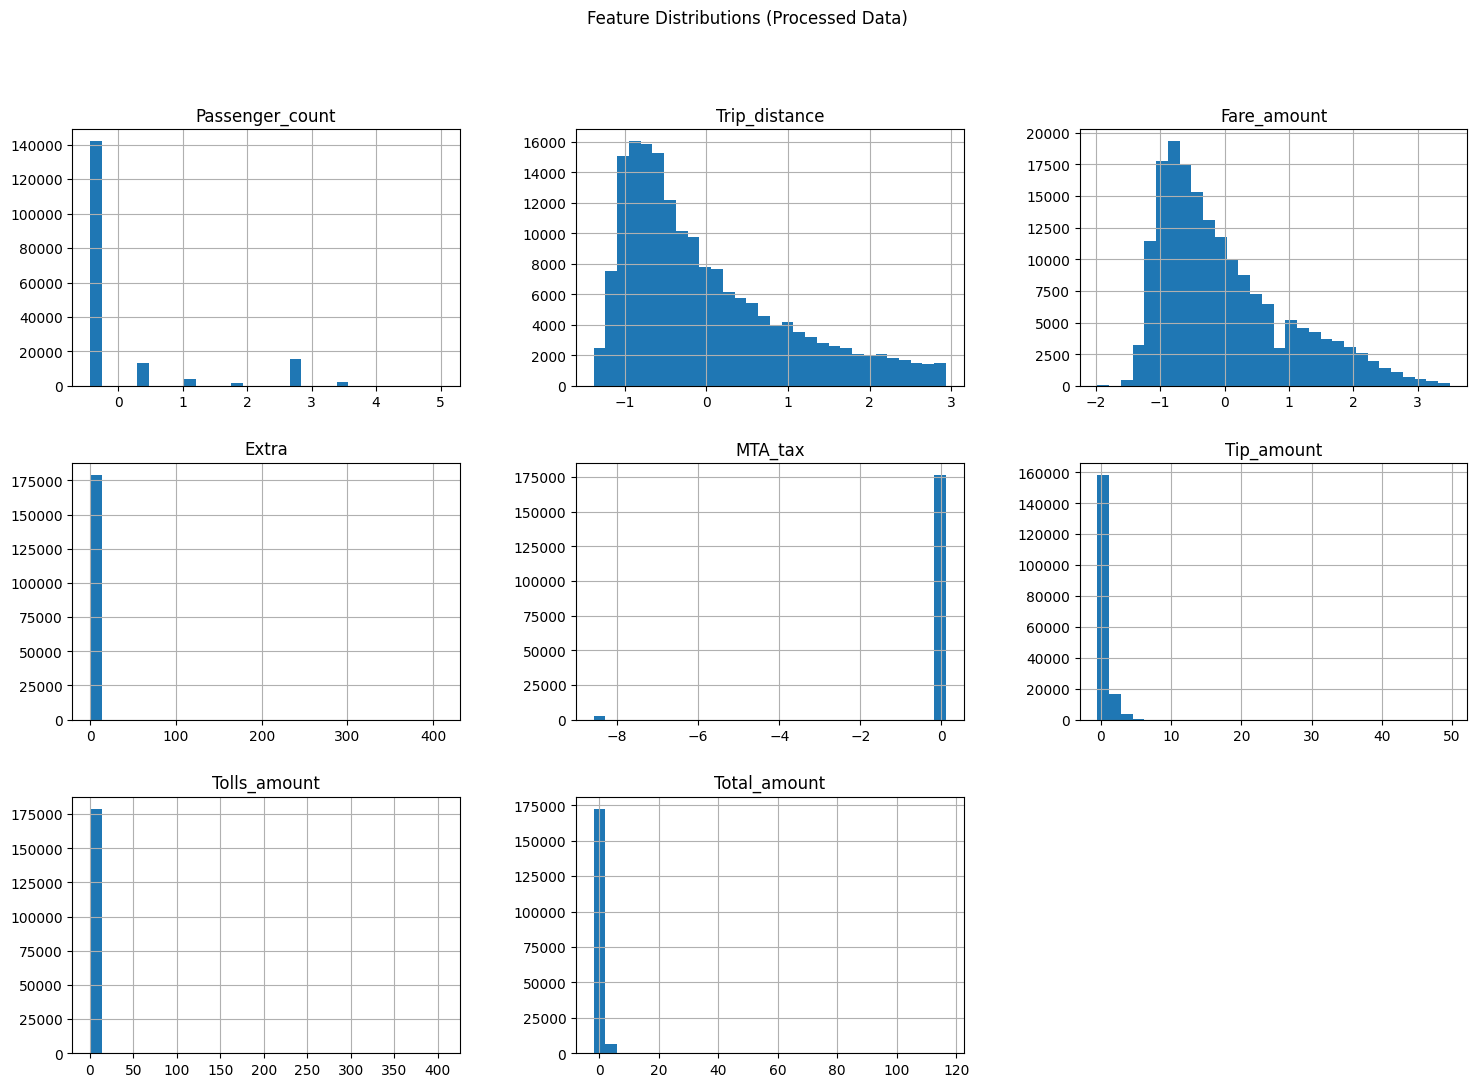

In [14]:
# Plot updated feature distributions for processed data
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded[numeric_cols].hist(figsize=(18, 12), bins=30)
plt.suptitle('Feature Distributions (Processed Data)')
plt.show()

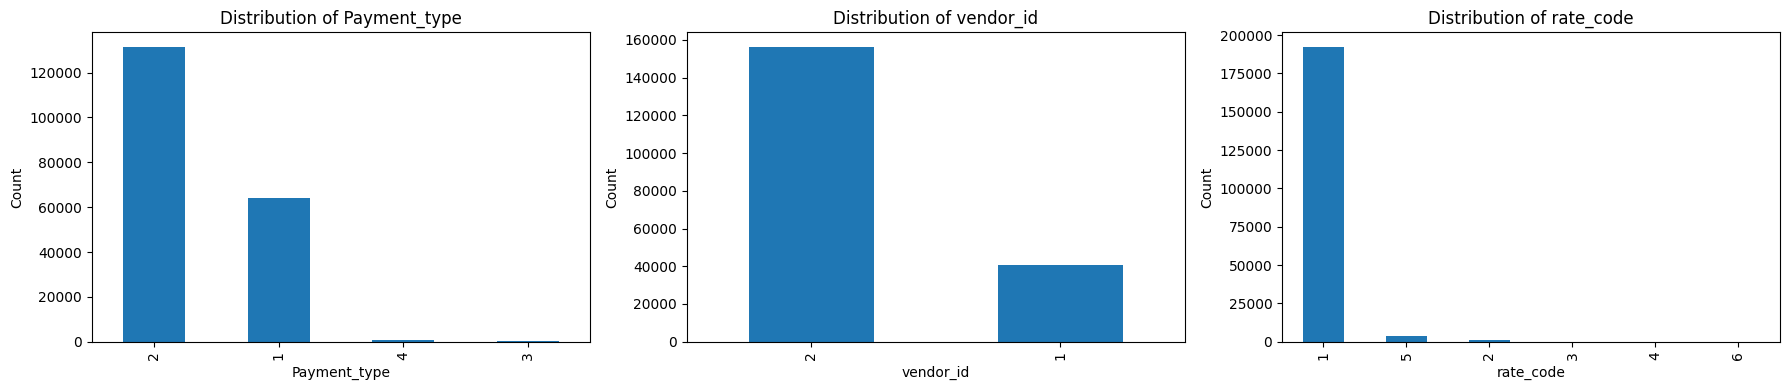

In [15]:
# Plot bar charts for original categorical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, col in enumerate(['Payment_type', 'vendor_id', 'rate_code']):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [16]:
# Calculate skewness for Trip_distance and Fare_amount in processed data
skew_trip = df_encoded['Trip_distance'].skew()
skew_fare = df_encoded['Fare_amount'].skew()
print(f'Skewness of Trip_distance: {skew_trip:.2f}')
print(f'Skewness of Fare_amount: {skew_fare:.2f}')

Skewness of Trip_distance: 1.03
Skewness of Fare_amount: 0.96


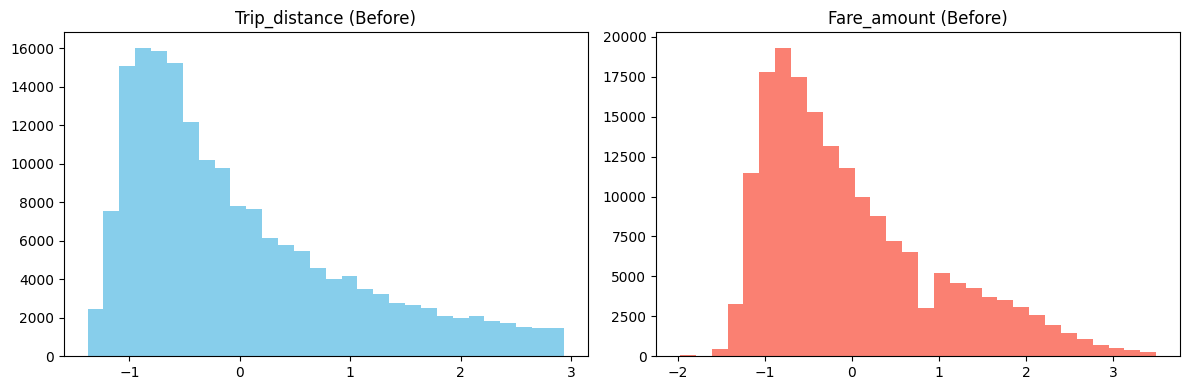

In [17]:
# Plot histograms before transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df_encoded['Trip_distance'], bins=30, color='skyblue')
axes[0].set_title('Trip_distance (Before)')
axes[1].hist(df_encoded['Fare_amount'], bins=30, color='salmon')
axes[1].set_title('Fare_amount (Before)')
plt.tight_layout()
plt.show()

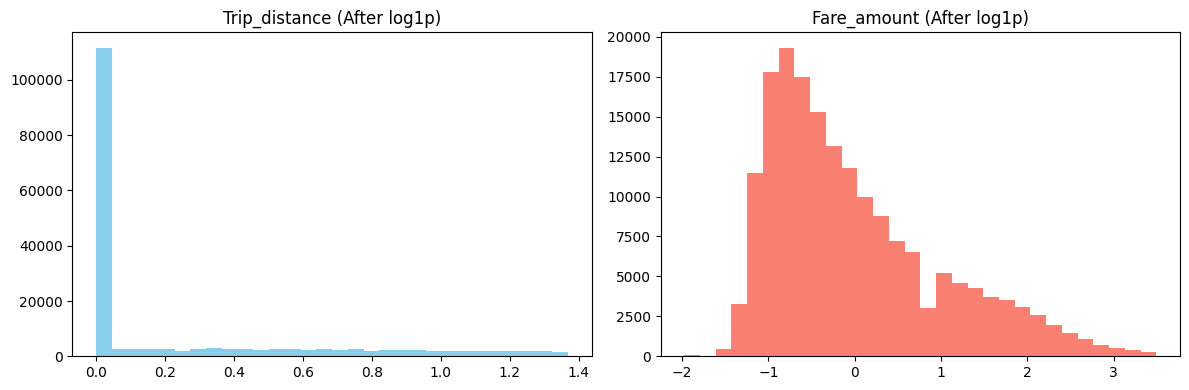

In [18]:
# Apply log1p transformation if skewness is high and plot after transformation

transformed = True

# Ensure columns are numeric and handle missing values before transformation
for col in ['Trip_distance', 'Fare_amount']:
    if col in df_encoded.columns:
        # Convert to numeric, coerce errors, and fill NaN with 0
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')
        # Force all values to be real numbers (remove imaginary part if any)
        df_encoded[col] = df_encoded[col].apply(np.real) # type: ignore
        if df_encoded[col].isnull().any():
            df_encoded[col] = df_encoded[col].fillna(0)
        # Ensure all values are float type
        df_encoded[col] = df_encoded[col].astype(float)
        # Ensure all values are finite and non-negative before log1p
        if abs(float(df_encoded[col].skew())) > 1: # type: ignore
            # Set negative values to zero to avoid log1p domain error
            df_encoded[col] = df_encoded[col].clip(lower=0)
            df_encoded[col] = np.log1p(df_encoded[col])
            transformed = True

if transformed:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(df_encoded['Trip_distance'], bins=30, color='skyblue')
    axes[0].set_title('Trip_distance (After log1p)')
    axes[1].hist(df_encoded['Fare_amount'], bins=30, color='salmon')
    axes[1].set_title('Fare_amount (After log1p)')
    plt.tight_layout()
    plt.show()
else:
    print('No transformation applied; skewness is acceptable.')

New skewness of Trip_distance after Yeo-Johnson: 0.72
New skewness of Fare_amount after Yeo-Johnson: 0.11
New skewness of Fare_amount after Yeo-Johnson: 0.11


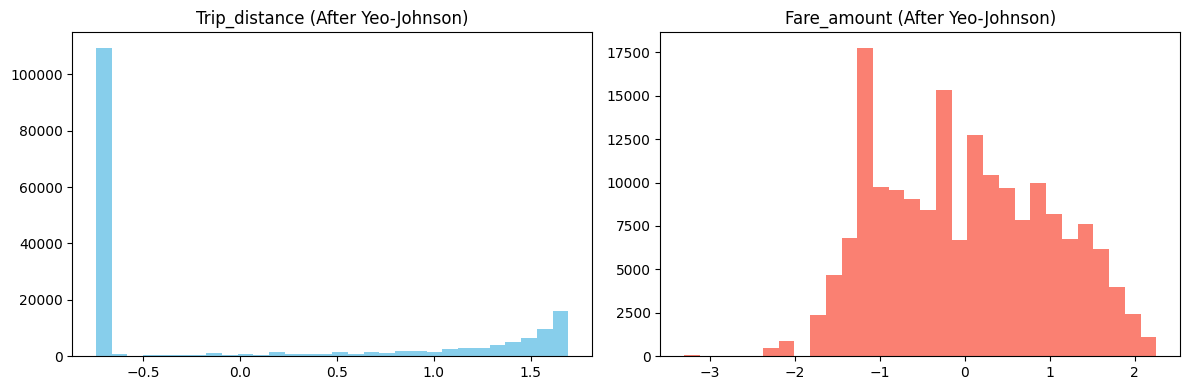

In [19]:
pt = PowerTransformer(method='yeo-johnson')
for col in ['Trip_distance', 'Fare_amount']:
    df_encoded[col] = pt.fit_transform(df_encoded[[col]])
    print(f'New skewness of {col} after Yeo-Johnson: {df_encoded[col].skew():.2f}')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df_encoded['Trip_distance'], bins=30, color='skyblue')
axes[0].set_title('Trip_distance (After Yeo-Johnson)')
axes[1].hist(df_encoded['Fare_amount'], bins=30, color='salmon')
axes[1].set_title('Fare_amount (After Yeo-Johnson)')
plt.tight_layout()
plt.show()

# 3. Modeling Purpose and Feature Selection
The goal is to predict `Total_amount` for a given trip, using features such as trip distance, date (weekday/weekend), and other relevant variables. The selected features are:
- Store_and_fwd_flag
- Passenger_count
- Trip_distance
- Fare_amount
- Extra
- MTA_tax
- Tip_amount
- Tolls_amount
- Payment_type_2, Payment_type_3, Payment_type_4
- vendor_id_2
- rate_code_2, rate_code_3, rate_code_4, rate_code_5, rate_code_6
- is_weekend (derived from the trip date)

`Total_amount` will be the target variable.

In [20]:
# Extract is_weekend feature from datetime column
# Assumes original datetime column is named 'lpep_pickup_datetime' or similar
if 'lpep_pickup_datetime' in df.columns:
    df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
    df['is_weekend'] = df['lpep_pickup_datetime'].dt.weekday >= 5
    df['is_weekend'] = df['is_weekend'].astype(int)
    # Add to df_encoded if not already present
    if 'is_weekend' not in df_encoded.columns:
        df_encoded['is_weekend'] = df['is_weekend']
else:
    print('Datetime column not found. Please update the column name if needed.')

Datetime column not found. Please update the column name if needed.


In [21]:
# Select only the specified features for modeling
selected_features = [
    'Passenger_count', 'Trip_distance', 'Tolls_amount', 'rate_code', 'Fare_amount', 'Total_amount'
# Only these columns will be used
 ]
missing = [col for col in selected_features if col not in df_encoded.columns]
if missing:
    print('Missing columns:', missing)
df_model = df_encoded[[col for col in selected_features if col in df_encoded.columns]].copy()
display(df_model.head())

Missing columns: ['rate_code']


,Passenger_count,Trip_distance,Tolls_amount,Fare_amount,Total_amount
1,2.684069,-0.743183,-0.027838,-0.923954,-0.699019
2,-0.437048,-0.743183,-0.027838,-0.764403,-0.775800
3,-0.437048,-0.743183,-0.027838,0.056549,-0.238336
4,-0.437048,0.816822,-0.027838,0.716032,0.299128
5,-0.437048,1.127015,-0.027838,0.467297,-0.007995


In [22]:
# Encode Store_and_fwd_flag as numeric (0/1)
if 'Store_and_fwd_flag' in df_model.columns:
    df_model['Store_and_fwd_flag'] = df_model['Store_and_fwd_flag'].map({'N': 0, 'Y': 1})
    print('Store_and_fwd_flag encoded as 0/1.')

In [23]:
import numpy as np

# Impute missing values: numeric columns with median, categorical columns with mode
for col in df_model.columns:
    if df_model[col].isnull().any():
        if df_model[col].dtype in [np.float64, np.int64]:
            df_model[col] = df_model[col].fillna(df_model[col].median())
        else:
            df_model[col] = df_model[col].fillna(df_model[col].mode()[0])
print('Missing values imputed: numeric with median, categorical with mode.')

Missing values imputed: numeric with median, categorical with mode.


In [24]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

# Set Total_amount as the target variable
target_col = 'Total_amount'
X = df_model.drop(target_col, axis=1)
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Target variable:', target_col)

Train shape: (143105, 4)
Test shape: (35777, 4)
Target variable: Total_amount


# 4. Ensemble Model Training and Evaluation
We will train and evaluate ensemble regression models (Random Forest and Gradient Boosting) to predict `Total_amount`. Performance will be compared using RMSE, MAE, and R².

In [25]:
# Ensure selected_features contains the 9 features used in the app
selected_features = [
    'Passenger_count', 'Trip_distance', 'Tolls_amount', 'Fare_amount',
    'rate_code_2', 'rate_code_3', 'rate_code_4', 'rate_code_5', 'rate_code_6'
 ]
selected_features = [col for col in selected_features if col in df_encoded.columns]
X = df_encoded[selected_features]
y = df_encoded['Total_amount']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train and evaluate Random Forest Regressor to predict Total_amount
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=50, random_state=15)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf:.2f}')
print(f'Random Forest MAE: {mae_rf:.2f}')
print(f'Random Forest R²: {r2_rf:.2f}')

Random Forest RMSE: 0.64
Random Forest MAE: 0.15
Random Forest R²: 0.67


In [26]:
# Train and evaluate Gradient Boosting Regressor to predict Total_amount
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=80, random_state=6)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting RMSE: {rmse_gb:.2f}')
print(f'Gradient Boosting MAE: {mae_gb:.2f}')
print(f'Gradient Boosting R²: {r2_gb:.2f}')

Gradient Boosting RMSE: 0.62
Gradient Boosting MAE: 0.15
Gradient Boosting R²: 0.68


In [27]:
# Train and evaluate Extra Trees Regressor to predict Total_amount
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(n_estimators=80, random_state=7)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

rmse_et = np.sqrt(mean_squared_error(y_test, y_pred_et))
mae_et = mean_absolute_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)

print(f'Extra Trees RMSE: {rmse_et:.2f}')
print(f'Extra Trees MAE: {mae_et:.2f}')
print(f'Extra Trees R²: {r2_et:.2f}')

Extra Trees RMSE: 0.64
Extra Trees MAE: 0.15
Extra Trees R²: 0.67


In [28]:
# Stacking Ensemble: meta-model trained on the same 9 features as base models
from sklearn.linear_model import LinearRegression

# Meta-model is trained on the same features as base models (not on base model predictions)
meta_model = LinearRegression()
meta_model.fit(X_train, y_train)
stacked_pred = meta_model.predict(X_test)

rmse_stack = np.sqrt(mean_squared_error(y_test, stacked_pred))
mae_stack = mean_absolute_error(y_test, stacked_pred)
r2_stack = r2_score(y_test, stacked_pred)

print(f'Stacking Ensemble RMSE: {rmse_stack:.2f}')
print(f'Stacking Ensemble MAE: {mae_stack:.2f}')
print(f'Stacking Ensemble R²: {r2_stack:.2f}')

Stacking Ensemble RMSE: 0.37
Stacking Ensemble MAE: 0.21
Stacking Ensemble R²: 0.89


In [29]:
# Compare ensemble model performance for Fare_amount prediction
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Extra Trees', 'Stacking Ensemble'],
    'RMSE': [rmse_rf, rmse_gb, rmse_et, rmse_stack],
    'MAE': [mae_rf, mae_gb, mae_et, mae_stack],
    'R2': [r2_rf, r2_gb, r2_et, r2_stack]
})
display(results)

,Model,RMSE,MAE,R2
0,Random Forest,0.635789,0.153049,0.672270
1,Gradient Boosting,0.623633,0.149924,0.684683
2,Extra Trees,0.636300,0.154654,0.671743
3,Stacking Ensemble,0.366258,0.209173,0.891241


In [30]:
import joblib
import pickle
import os

# Define the models directory
from sklearn.preprocessing import StandardScaler
# Use available one-hot encoded rate_code columns instead of 'rate_code'
selected_features = [
    'Passenger_count', 'Trip_distance', 'Tolls_amount', 'Fare_amount',
    'rate_code_2', 'rate_code_3', 'rate_code_4', 'rate_code_5', 'rate_code_6'
 ]
# Only keep features that exist in df_encoded
selected_features = [col for col in selected_features if col in df_encoded.columns]
X_train = df_encoded[selected_features].copy()
scaler = StandardScaler()
scaler.fit(X_train)
models_dir = r'D:\RNW\Project\Simple Linear Regression\Green-Texti\Exam-25\Models'
os.makedirs(models_dir, exist_ok=True)

joblib.dump(rf, os.path.join(models_dir, 'rf_model.pkl'))
joblib.dump(gb, os.path.join(models_dir, 'gb_model.pkl'))
joblib.dump(et, os.path.join(models_dir, 'et_model.pkl'))
joblib.dump(scaler, os.path.join(models_dir, 'scaler.pkl'))
with open(os.path.join(models_dir, 'meta_model.pkl'), 'wb') as f:
    pickle.dump(meta_model, f)
print(f'Models and scaler saved in {models_dir} for web app use (with 9 features).')

Models and scaler saved in D:\RNW\Project\Simple Linear Regression\Green-Texti\Exam-25\Models for web app use (with 9 features).
